---

# **Data Preprocessing**

Data preprocessing is the **first step** in any data analysis or machine learning pipeline. It involves **cleaning**, **transforming**, and **organizing** raw data to ensure it is accurate, consistent, and ready for modeling.

---

## **Why Data Preprocessing Matters**

Effective preprocessing has a significant impact on model performance:

* **Improved Learning:**
  Clean and well-structured data helps models learn meaningful patterns instead of noise.

* **Reliable Predictions:**
  Properly processed data prevents misleading inputs, resulting in more accurate and dependable predictions.

* **Enhanced Model Performance:**
  Organized data simplifies the creation of relevant features, contributing to stronger models.

* **Better EDA (Exploratory Data Analysis):**
  Well-prepared data makes patterns and trends easier to interpret, supporting deeper insights during EDA.

---


**Step 1: Import Libraries and Load Dataset**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Step 2: Inspect Data Structure and Check Missing Values**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#check missing data 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Step 3: Statistical Summary and Visualizing Outliers**

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


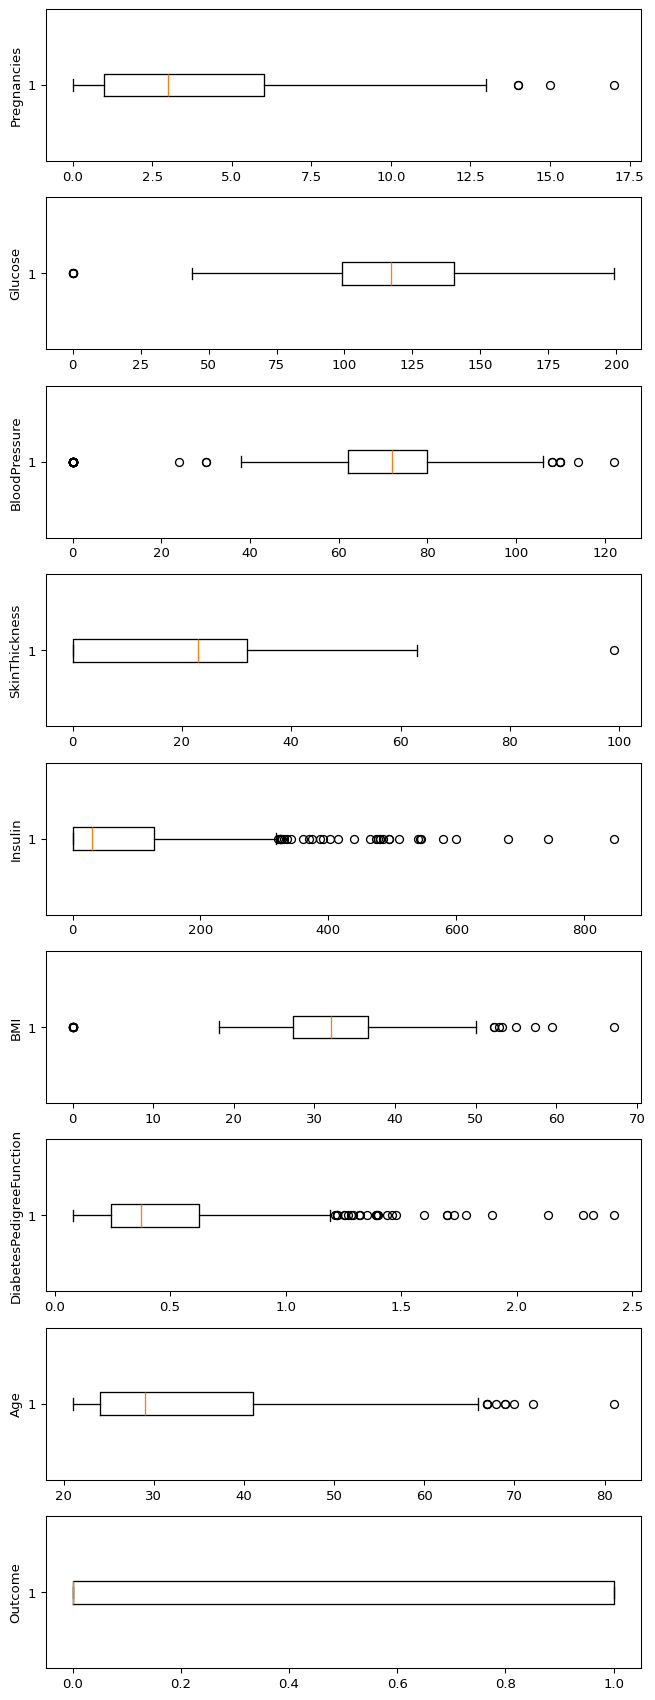

In [6]:
fig, axs = plt.subplots(len(df.columns), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

**Step 4: Remove Outliers Using the Interquartile Range (IQR) Method**

Remove extreme values beyond a reasonable range to improve model robustness.

IQR = Q3 (75th percentile) – Q1 (25th percentile).

Values below Q1 - 1.5IQR or above Q3 + 1.5IQR are outliers.

Calculate lower and upper bounds for each column separately.

Filter data points to keep only those within bounds.

In [7]:
q1, q3 = np.percentile(df['Insulin'], [25, 75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
clean_df = df[(df['Insulin'] >= lower) & (df['Insulin'] <= upper)]

**Step 5: Correlation Analysis**

Understand relationships between features and the target variable (Outcome). Correlation helps gauge feature importance.

df.corr(): Computes pairwise correlation coefficients between columns.

Heatmap via seaborn visualizes correlation matrix clearly.

Sorting correlations with corr['Outcome'].sort_values() highlights features most correlated with the target.

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

print(corr['Outcome'].sort_values(ascending=False))

**Step 6: Visualize Target Variable Distribution**

Check if target classes (Diabetes vs Not Diabetes) are balanced, affecting model training and evaluation.

plt.pie(): Pie chart to display proportion of each class in the target variable 'Outcome'.

In [ ]:
plt.pie(df['Outcome'].value_counts(), labels=[
        'Diabetes', 'Not Diabetes'], autopct='%.f%%', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

**Step 7: Separate Features and Target Variable**

Prepare independent variables (features) and dependent variable (target) separately for modeling.

df.drop(columns=[...]): Drops the target column from features.

Direct column selection df['Outcome'] selects target column.

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

**Step 8: Feature Scaling: Normalization and Standardization**

Scale features to a common range or distribution, important for many ML algorithms sensitive to feature magnitudes.

1. Normalization (Min-Max Scaling): Rescales features between 0 and 1. Good for algorithms like k-NN and neural networks.

Class: MinMaxScaler from sklearn.

.fit_transform(): Learns min/max from data and applies scaling.

In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])

2. Standardization: Transforms features to have mean = 0 and standard deviation = 1, useful for normally distributed features.

Class: StandardScaler from sklearn.

In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized[:5])